In [1]:
k = 9

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [3]:
# Preprocessing
scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
latent_space =6#6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 30000  #20000

X_train= x,y (1000, 2)
y_train= z (1000, 1)


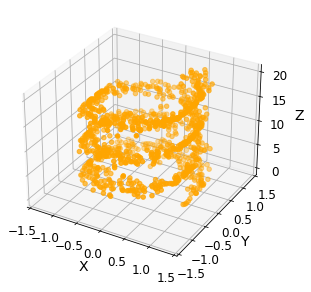

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [6]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(k, n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                216       
_________________________________________________________________
batch_normalization (BatchNo (None, 36)                144       
_________________________________________________________________
re_lu (ReLU)                 (None, 36)                0         
_________________________________________________________________
reshape (Reshape)            (None, 6, 6)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 6, 12)             72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 12)             48        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


Epoch 1/30000
INFO:tensorflow:Assets written to: ./content/dcgan_v9_epochs_1/assets
INFO:tensorflow:Assets written to: GANS/Models/generator_v9_epochs_1/assets
INFO:tensorflow:Assets written to: GANS/Models/discriminator_v9_epochs_1/assets
Loss: 
save loss


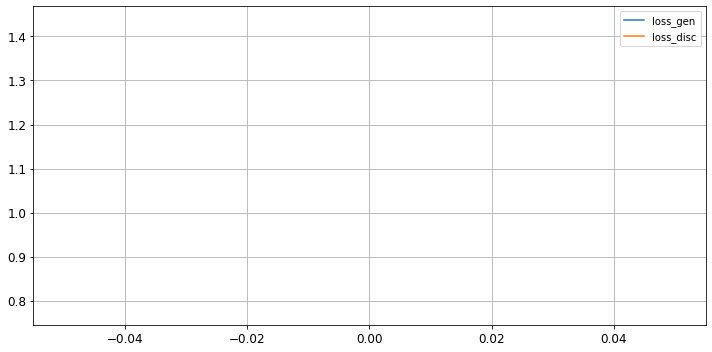

Predicted Values: (1000, 3)
save latent space


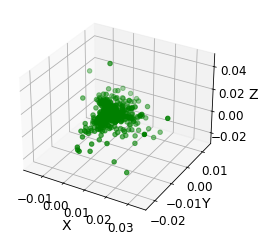

save countour line


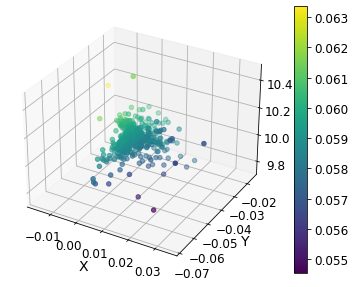

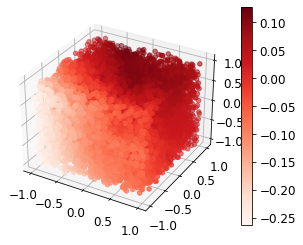

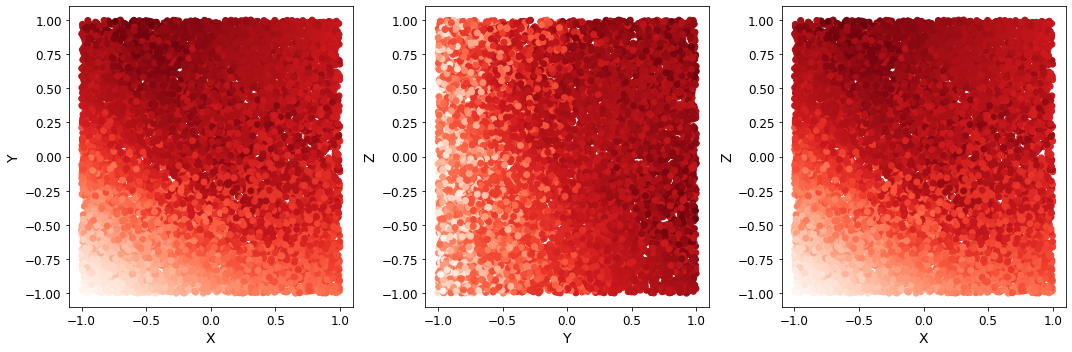

ValueError: Must pass 2-d input. shape=(100, 100, 100)

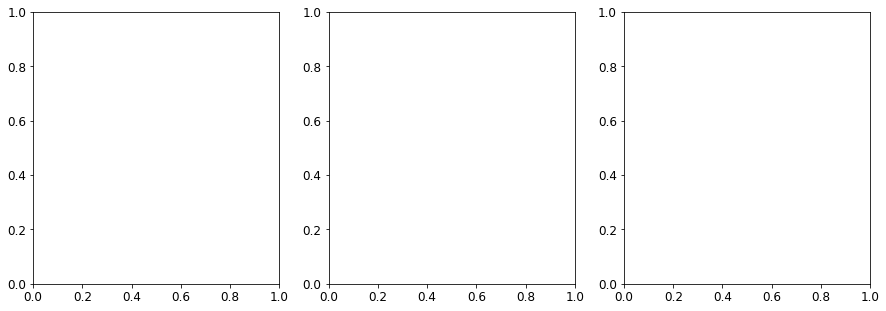

In [8]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [ ]:
k=k
epoch = epochs

In [ ]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [ ]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch))

In [ ]:
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

In [ ]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

#1=real, 0=fake

### Applying the prediction function

## Fixed Input